In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
#import KDEpy
from scipy.stats import norm
#from scipy.stats import multivariate_normal as norm3D
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import multivariate_normal as norm3
import sys
from scipy.stats import norm
from Bayes import *

In [2]:
stand=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/STANDARD/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
ALPH1_115=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/ALPHA1.115/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
ALPH1_13=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/ALPHA1.13/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
ALPH1_12=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/ALPHA1.12/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
#ALPH1_11=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/ALPHA1.11/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
#dat0_0=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/Test1/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
datreal_=pd.read_csv("/home/jon/Lens_Bois/real_quads_processed.dat",sep=' ',skipinitialspace=True)
samp=pd.read_csv("/home/jon/Lens_Bois/ALPHPOT/STANDARDSAMP/anglesALPHAlots.dat20c",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
#dat1=pd.read_csv("/home/jon/Lens_Bois/SHEAR/g.1N100kP2/angles6M.dat0",sep=' ', skipinitialspace=True, names=['xs','ys','the12','the34','the23','sock','d1','d2','d3'])
ALPH1_115=ALPH1_115.values[0:100000,:]
ALPH1_13=ALPH1_13.values[0:100000,:]
ALPH1_12=ALPH1_12.values[0:100000,:]
#ALPH1_11=ALPH1_11.values[0:100000,:]
samp=samp.values[0:100000,:]
datreal=datreal_.values
stand=stand.values[0:100000,:]

In [9]:
stand.size/9

100001.0

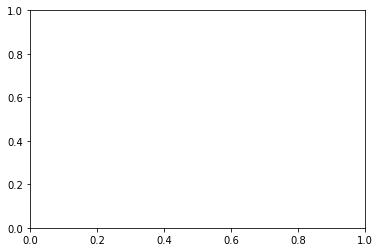

In [4]:
makehists1D("/home/jon/Lens_Bois/plots/","1D Comparison",stand,ALPH1_13,samp,'STAND','ALPH1_12')

In [4]:
n=[10,10,10,50,50,50]

B,N,B_r=LongBayes(ALPH1_12,stand,samp[8000:8400,:],n,NUMCUTS=50,DIM=3)
print("Bayes Factor: ",B)
print("Number of Bins: ",N)
print("Reduced Bayes Factor:",B_r)

Bayes Factor:  -33677.76954358666
Number of Bins:  3623
Reduced Bayes Factor: -9.29554776251357


In [3]:
print("RUNNING BAYES TESTS FOR ALL SAMPLES")
PATH="/home/jon/Lens_Bois/plots/1D_Comparison_STAND_ALPH1_13/"
n=[10,10,10,50,50,50]
arr=[]
arr_r=[]
arr_n=[]
p1=stand
p2=ALPH1_115
S=samp
size=50
A=np.zeros((int(S[:,0].size/size),3))
for i in range(0,250*size,size):
    s=S[i:i+size,:]
    n=[10,10,10,50,50,50]
    B,N,B_r=LongBayes(p1,p2,s,n,NUMCUTS=50,DIM=3)
    arr.append(B)
    arr_r.append(B_r)
    arr_n.append(N)
    A[int(i/size),1]=B
    A[int(i/size),0]=N
    A[int(i/size),2]=B_r
BayesData=pd.DataFrame(A,columns=['NUM_BINS','BAYES','REDUCED BAYES'])
BayesData.to_csv(PATH+"HistData50.dat")


RUNNING BAYES TESTS FOR ALL SAMPLES


[0.0, 39.83594781085251, 0.0, 69.2303336014054, 134.14200119626008, 0.0, 0.0, 0.0, 0.0, 0.0, 39.83594781085251, 96.49564081810814, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 65.62100059813002, 65.62100059813002, 65.62100059813002, 0.0, 0.0, 0.0, 0.0, 65.62100059813002, 0.0, 65.62100059813002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 69.2303336014054, 0.0, 0.0, 65.62100059813002, 65.62100059813002, -17.128679513998634, -3.238284815613065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 134.85133419953542, 39.83594781085251, 0.0, 0.0, -3.238284815613065, 65.62100059813002, 0.0, 0.0, 65.62100059813002, 0.0, 0.0, 0.0, 0.0, 0.0, 69.2303336014054, 62.138281790110874, 0.0, 0.0, -7.092051811294527, 65.62100059813002, 0.0, 0.0, 0.0, 36.901934919406855, 0.0, 36.901934919406855, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 27.26530721670274, -3.238284815613065, 0.0, 39.83594781085251, 65.62100059813002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 65.99204878579233, 0.0, -17.128679513998634, 0

In [31]:
BayesData=pd.read_csv("/home/jon/Lens_Bois/plots/1D_Comparison_Off5_Off2/HistData.dat",index_col=0)
arr_r=BayesData.iloc[0:250,2]
PATH="/home/jon/Lens_Bois/plots/1D_Comparison_Off5_Off2/"
BayesData.head()


,NUM_BINS,BAYES,REDUCED BAYES
0,526.0,9329.034507,17.735807
1,526.0,17664.056039,33.581856
2,526.0,11186.781383,21.267645
3,526.0,15219.998764,28.935359
4,526.0,10629.610200,20.208384


In [5]:
def func(x,mu,sig):
    return (1/1)*norm.pdf(x,mu,sig)

In [23]:
BayesData.head()

,NUM_BINS,BAYES,REDUCED BAYES
0,3623.0,24512.396056,6.765773
1,3623.0,33034.968381,9.118125
2,3623.0,28127.453302,7.763581
3,3623.0,31556.335501,8.710002
4,3623.0,34618.147283,9.555106


250
18.716310462048142
5.903513118991191
3.1703682341009918


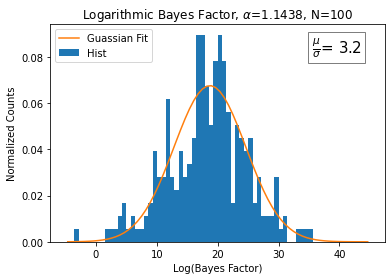

In [6]:
PATH="/home/jon/Lens_Bois/plots/1D_Comparison_STAND_ALPH1_13/"
#BayesData=pd.DataFrame(A,columns=['NUM_BINS','BAYES','REDUCED BAYES'])
#BayesData.to_csv(PATH+"HistData50.dat")
#BayesData=pd.read_csv(PATH+"HistData100.dat",index_col=0)
#arr_r=BayesData.iloc[0:250,2]
#print(BayesData.head())

fig=plt.figure()
N,bins,p=plt.hist(arr_r,bins=70,range=[-5,45],density=True)
print(len(arr_r))
#plt.hold(True)
plt.title(r'Logarithmic Bayes Factor, $\alpha$=1.1438, N=100')
plt.xlabel("Log(Bayes Factor)")
plt.ylabel("Normalized Counts")
#plt.savefig()
xarr=(bins[0:len(bins)-1]+bins[1:len(bins)])/2
popt,pcov=sp.optimize.curve_fit(func,xarr,N,p0=[-50000,20000])
mu=popt[0]
sig=popt[1]
r=norm()
plt.plot(xarr,(1/sig)*r.pdf((xarr-mu)/sig),'tab:orange')
textstr=r'$\frac{\mu}{\sigma}$= '+str(round(mu/sig,1))
plt.figtext(0.73, 0.78, textstr,fontsize=15,bbox=dict(facecolor='white', alpha=0.5))
plt.legend(["Guassian Fit","Hist"],loc=2)
plt.savefig(PATH+"BayesDist100.png")

print(mu)
print(sig)
print((mu)/sig)